In [1]:
import numpy as np
import matplotlib.pyplot as plt
from covid19_DTM.data import sciensano

In [2]:
df_hosp, df_mort, df_cases, df_vacc = sciensano.get_sciensano_COVID19_data(update=False)
df_hosp = df_hosp.groupby(by=['date']).sum()
df_mort = df_mort.groupby(by=['date']).sum()

In [3]:
f = lambda I, N, k : 1-(1-I/N)**k

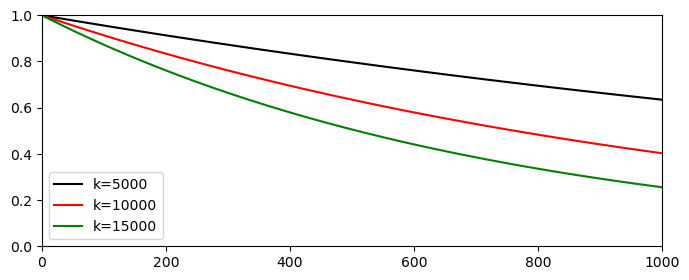

In [13]:
fig,ax=plt.subplots(figsize=(8,3))
I = np.linspace(start=0, stop=1000)
ax.plot(I, 1-f(I,N,5000), color='black', label='k=5000')
ax.plot(I, 1-f(I,N,10000), color='red', label='k=10000')
ax.plot(I, 1-f(I,N,15000), color='green', label='k=15000')
ax.legend()
ax.set_ylim([0,1])
ax.set_xlim([0,1000])
plt.show()
plt.close()

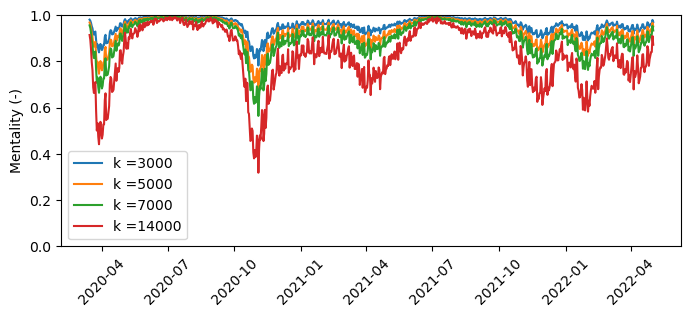

In [4]:
k_list = [3000, 5000, 7000, 14000]
I = df_hosp['H_in']
N = 11e6

fig,ax=plt.subplots(figsize=(8,3))
for k in k_list:
    ax.plot(1-f(I,N,k), label='k ='+str(k))
ax.legend()
ax.set_ylim([0,1])
ax.set_ylabel('Mentality (-)')
ax.tick_params(axis='x', labelrotation=45)
plt.show()
plt.close()